SMITA GUPTA<br>
USC ID: 4123927261

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import math
import matplotlib.pyplot as plt
import sklearn

from statsmodels.compat import lzip
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_curve, auc, classification_report
from sklearn.neighbors import DistanceMetric
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import iqr
from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

EXPLORING THE DATA:<br>
<br>
b) i) How many rows are in this data set? How many columns? What do the rows and columns represent?<br>
Sol.) There are 9568 rows and 5 columns as seen in the below output. <br>Columns represent data related to hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH), Exhaust Vacuum (V) and net hourly electrical energy output (PE) of the plant.<br> Rows represent Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (PE) of the plant.

In [2]:
df = pd.read_excel('Data/Folds5x2_pp.xlsx', sheet_name='Sheet1')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


b) ii) Make pairwise scatterplots of all the variables in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.<br>
Sol.) A scatterplot should always include a description of the form, direction, and strength of the association, along with the presence of any outliers.<br>
For AT vs PE, form: linear; Direction: Negative Association; Strength: Strong<br>
For V vs PE, form: linear; Direction: Negative Association; Strength: Strong<br>
For AP vs PE, form: non-linear; Direction: Positive Association; Strength: Weak<br>
For RH vs PE, form: non-linear; Direction: Positive Association; Strength: Weak<br>
Outliers are predicted on the basis of Box and whisker plot in later questions.

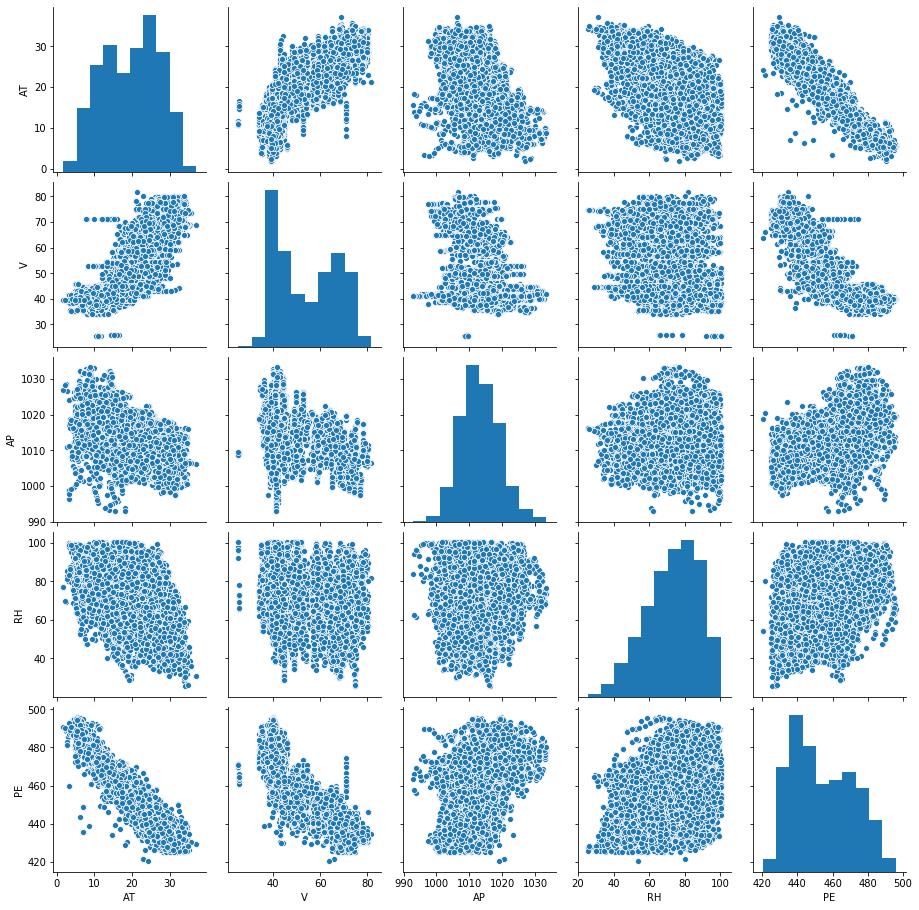

In [3]:
sns.pairplot(df)

b) iii) What are the mean, the median, range, first and third quartiles, and in- terquartile ranges of each of the variables in the dataset? Summarize them in a table.<br>
Sol.) The output of below two rows provide the answer to this question.

In [4]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [5]:
print('Inter quantile range for feature AT is: ', iqr(df['AT']))
print('Inter quantile range for feature V is: ', iqr(df['V']))
print('Inter quantile range for feature AP is: ', iqr(df['AP']))
print('Inter quantile range for feature RH is: ', iqr(df['RH']))

Inter quantile range for feature AT is:  12.209999999999999
Inter quantile range for feature V is:  24.800000000000004
Inter quantile range for feature AP is:  8.159999999999968
Inter quantile range for feature RH is:  21.502499999999998


In [6]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27ec89d0>,
      dtype=object)

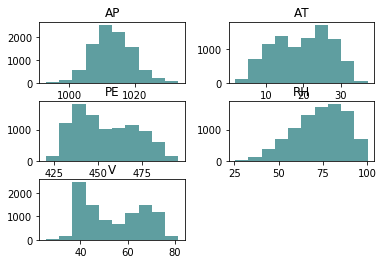

In [7]:
df.hist(grid = False, color = 'cadetblue')

c) For each predictor,fit a simple linear rtegression model to predict the response.
Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?<br>
Sol) The results can be described from the output for each row repectively for each feature individually with the label.<br>
The features AP and RH consits of outliers as can be seen from the box and whisker plot.

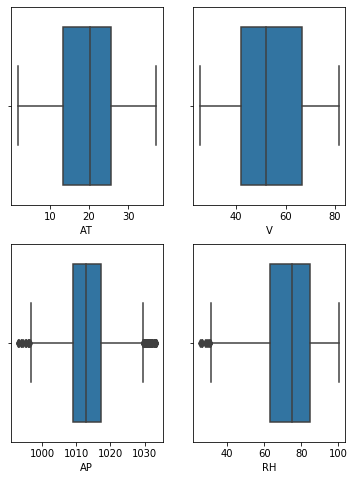

In [8]:
#Box and Whisker plot for the feature all the features
plt.figure(figsize=(6,8))
plt.subplot(2,2,1)
sns.boxplot(x = df["AT"])
plt.subplot(2,2,2)
sns.boxplot(x = df["V"])
plt.subplot(2,2,3)
sns.boxplot(x = df["AP"])
plt.subplot(2,2,4)
sns.boxplot(x = df["RH"])

plt.show()

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:02:13   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

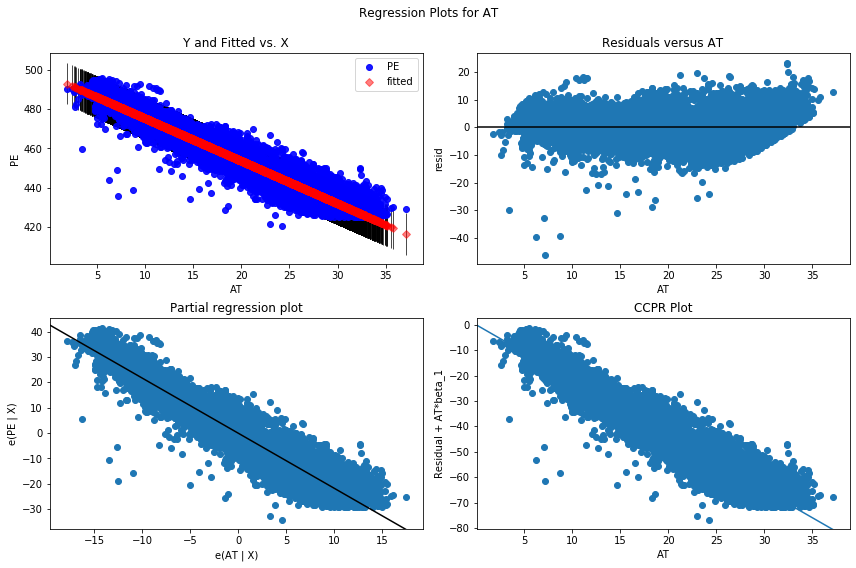

In [9]:
#Fitting univariate linear regression model for input variable 'AT' and ouput variable 'PE'
model1 = ols("PE ~ AT", data=df).fit()
print(model1.summary())
fig1 = plt.figure(figsize=(12,8))
fig1 = sm.graphics.plot_regress_exog(model1, "AT", fig=fig1)

Linear Equation: PE = 497.0341 + (-2.1713)AT<br>
As the p-value is 0, so this term is significant.<br>
The R-squared and adjusted R-squared value is 0.899. 89.9% of r-squared value means that all movements of a PE  are completely explained by movements in the AT.<br>
The f-static value is 8.510e+04 which is very good.<br>
Confidence Interval is [0.025    0.975].

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:02:17   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    517.8015      0.378   1370.218      0.0

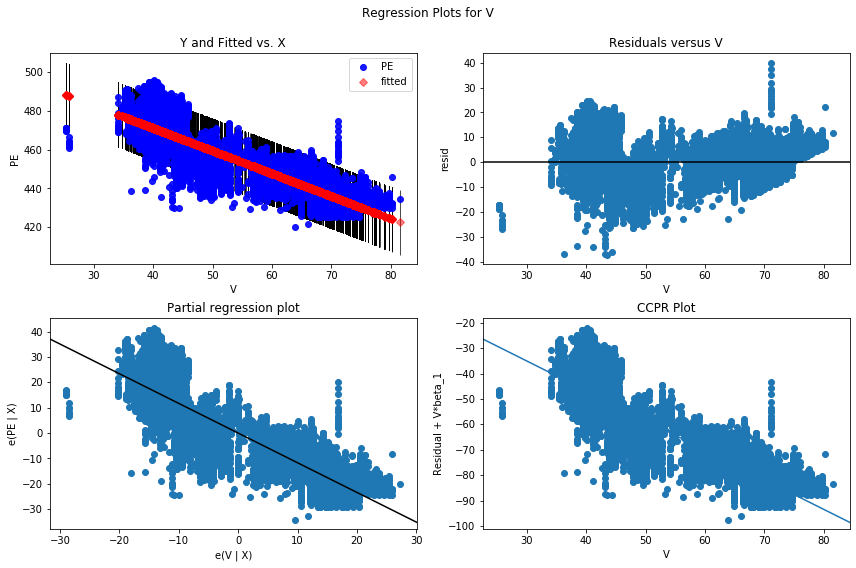

In [10]:
#Fitting univariate linear regression model for input variable 'V' and ouput variable 'PE'
model2 = ols("PE ~ V", data=df).fit()
print(model2.summary())
fig2 = plt.figure(figsize=(12,8))
fig2 = sm.graphics.plot_regress_exog(model2, "V", fig=fig2)

Linear Equation: PE = 517.8015 + (-1.1681)V<br>
As the p-value is 0, so this term is significant.<br>
The R-squared and adjusted R-squared value is 0.757 and 0.756 respectively. 75.7% of r-squared value means that all movements of a PE  are completely explained by movements in the V.<br>
The f-static value is 2.972e+04 which is very good.<br>
Confidence Interval is [0.025      0.975]

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:02:19   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1055.2610     25.459    -41.449      0.0

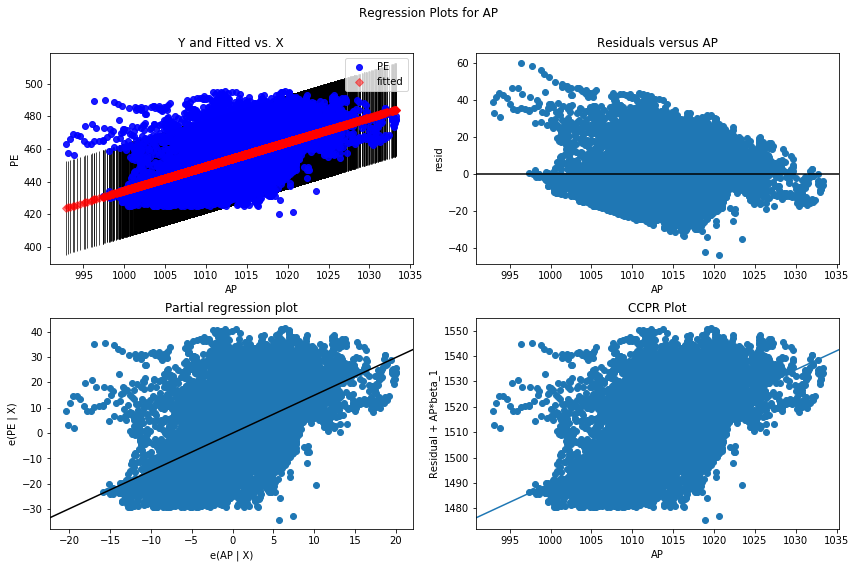

In [11]:
#Fitting univariate linear regression model for input variable 'AP' and ouput variable 'PE'
model3 = ols("PE ~ AP", data=df).fit()
print(model3.summary())
fig3 = plt.figure(figsize=(12,8))
fig3 = sm.graphics.plot_regress_exog(model3, "AP", fig=fig3)

Linear Equation: PE = (-1055.2610)  + 1.4899AP<br>
As the p-value is 0, so this term is significant.<br>
The R-squared and adjusted R-squared value is 0.269respectively. 26.9% of r-squared value means PE does not generally follow the movements of the AP.<br>
The f-static value is 3516.<br>
Confidence Interval is [0.025    0.975].

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:02:23   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    420.9618      0.823    511.676      0.0

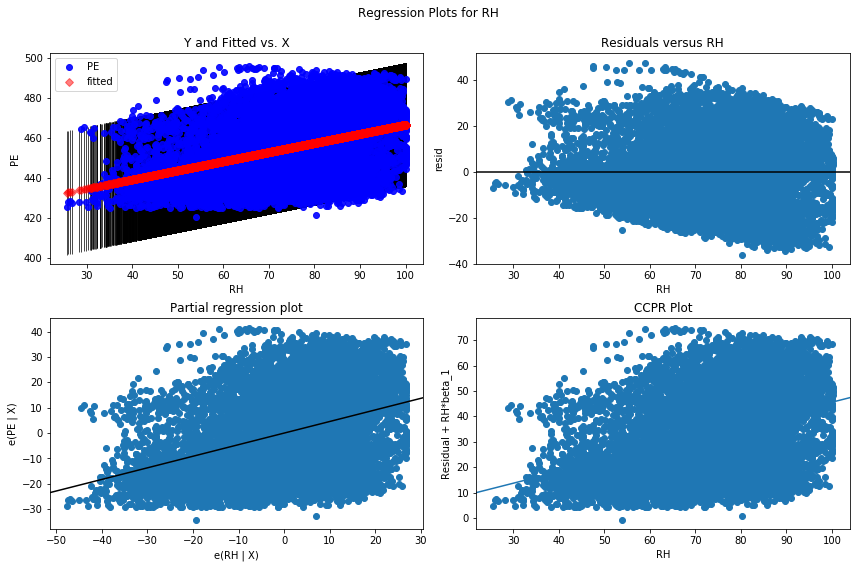

In [12]:
#Fitting univariate linear regression model for input variable 'RH' and ouput variable 'PE'
model4 = ols("PE ~ RH", data=df).fit()
print(model4.summary())
fig4 = plt.figure(figsize=(12,8))
fig4 = sm.graphics.plot_regress_exog(model4, "RH", fig=fig4)

Linear Equation: PE = 420.9618 + 0.4557RH<br>
As the p-value is 0, so this term is significant.<br>
The R-squared and adjusted R-squared value is 0.152 respectively. 15.2% of r-squared value means PE does not generally follow the movements of the RH.<br>
The f-static value is 1714.<br>
Confidence Interval is [0.025    0.975].

<br> 
<br>
(d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0 :βj =0?<br>
Sol.) Linear Equation: PE = 454.6093 + (-1.9775)AT + (-0.2339)V + (0.0621)AP + (-0.1581)RH<br>
As the p-value is 0, so all the terms are significant.<br>
The R-squared and adjusted R-squared value is 0.929 respectively. 92.9% of r-squared value means that all movements of PE  are completely explained by movements in the features.<br>
The f-static value is 3.114e+04 which is really good.<br>
Confidence Interval is [0.025    0.975].<br>

As every predictor is significant, therefore, we reject the null hypothesis for every predictor.

In [13]:
#Fitting multivariate linear regression model for all input variables and ouput variable 'PE'
model_multi = ols("PE ~ AT + V + AP + RH", data=df).fit()
print(model_multi.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:02:26   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

(e) How do your results from 1c compare to your results from 1d? Create a plot displaying the univariate regression coefficients from 1c on the x-axis, and the multiple regression coefficients from 1d on the y-axis. That is, each predictor is displayed as a single point in the plot. Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.<br>
Sol.)


Text(0.4, -0.12, 'RH')

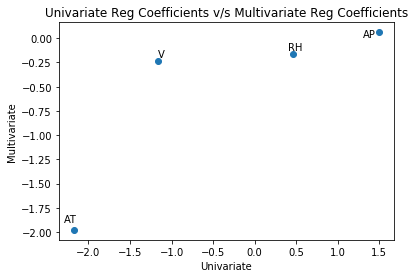

In [14]:
#Plotting the co-efficients for the univariate regression coefficients from 1c on the x-axis, 
#and the multiple regression coefficients from 1d on the y-axis
univariate_coef = [-2.1713, -1.1681, 1.4899, 0.4557]
multivariate_coef = [-1.9775, -0.2339, 0.0621, -0.1581]

plt.plot(univariate_coef, multivariate_coef, 'o')
plt.title('Univariate Reg Coefficients v/s Multivariate Reg Coefficients')
plt.xlabel('Univariate')
plt.ylabel('Multivariate')
plt.text(-2.3, -1.9, 'AT')
plt.text(-1.16, -0.2, 'V')
plt.text(1.3, 0.01, 'AP')
plt.text(0.4, -0.12, 'RH')

(f) Is there evidence of nonlinear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form2
Y =β0 +β1X+β2X2 +β3X3 +ε<br>
Sol.) As we can see from the graph, only AP has non-linear association.


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:02:27   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    492.7281      0.673    732.248      0.0

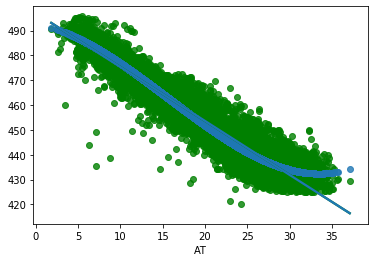

In [15]:
#Fitting the model for feature AT in polynomial form
Y = df['PE']
Y = Y.values.tolist()
Y = np.reshape(Y, (-1, 1))

X11 = df['AT']
X11 = X11.values.tolist()
X11 = np.reshape(X11, (-1, 1))
X12 = X11**2
X13 = X11**3

model_poly1 = ols("Y ~ X11 + X12 + X13", data=df).fit()
print(model_poly1.summary())

sns.regplot(x='AT', y='PE', data=df, color='green')
sns.regplot(x='AT', y=model_poly1.fittedvalues, data=df)

Polynomial Equation: <br>
PE = 492.7281 + (-0.6103)AT + (-0.1251)AT^2 + 0.0027AT^3

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.098e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:02:30   Log-Likelihood:                -33585.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9564   BIC:                         6.721e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    554.1468      9.151     60.557      0.0

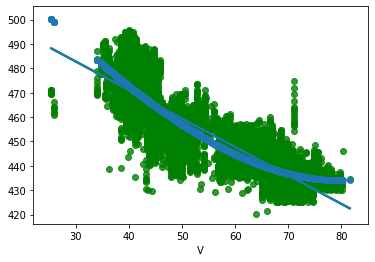

In [16]:
#Fitting the model for feature V in polynomial form
X21 = df['V']
X21 = X21.values.tolist()
X21 = np.reshape(X21, (-1, 1))
X22 = X21**2
X23 = X21**3

model_poly2 = ols("Y ~ X21 + X22 + X23", data=df).fit()
print(model_poly2.summary())
sns.regplot(x='V', y='PE', data=df, color='green')
sns.regplot(x='V', y=model_poly2.fittedvalues, data=df)

Polynomial Equation: <br>
PE = 554.1468  + (-2.1444)V + (-0.0027)V^2 + 0.0001V^3

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1813.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:02:35   Log-Likelihood:                -39184.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.840e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0747      0.009      8.415      0.0

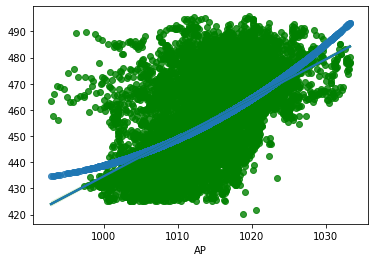

In [17]:
#Fitting the model for feature AP in polynomial form
X31 = df['AP']
X31 = X31.values.tolist()
X31 = np.reshape(X31, (-1, 1))
X32 = X31**2
X33 = X31**3

model_poly3 = ols("Y ~ X31 + X32 + X33", data=df).fit()
print(model_poly3.summary())
sns.regplot(x='AP', y='PE', data=df, color='green')
sns.regplot(x='AP', y=model_poly3.fittedvalues, data=df)

Polynomial Equation: <br>
PE = 0.0747  + (25.2556)AP + (-0.0500)AP^2 + (2.514e-05)AP^3

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     579.2
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:02:39   Log-Likelihood:                -39923.
No. Observations:                9568   AIC:                         7.985e+04
Df Residuals:                    9564   BIC:                         7.988e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    468.4135     10.545     44.422      0.0

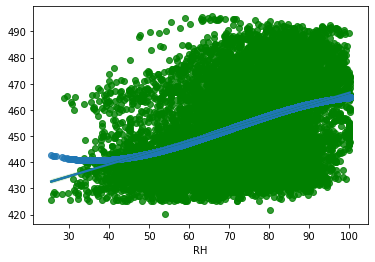

In [18]:
#Fitting the model for feature RH in polynomial form
X41 = df['RH']
X41 = X41.values.tolist()
X41 = np.reshape(X41, (-1, 1))
X42 = X41**2
X43 = X41**3

model_poly4 = ols("Y ~ X41 + X42 + X43", data=df).fit()
print(model_poly4.summary())
sns.regplot(x='RH', y='PE', data=df, color='green')
sns.regplot(x='RH', y=model_poly4.fittedvalues, data=df)

Polynomial Equation: <br>
PE = 468.4135 + (-1.7292)RH + (0.0321)RH^2 + (-0.0002)RH^3

(g) Is there evidence of association of interactions of predictors with the response? To answer this question, run a full linear regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.<br>
Sol.) The terms AT, AP and the interaction term AT.AP are insignificant as their p-value is not less than 0.05.<br>
<br>Significant terms: features V, RH<br>
                   interaction terms AT.V , AT.RH,  V.AP, V.RH, AP.RH

In [19]:
#Regression model with all pairwise interaction terms and state whether any interaction terms are statistically significant.
Data_int = df.copy()
Data_int['AT_V'] = Data_int['AT']* Data_int['V']
Data_int['AT_AP'] = Data_int['AT']* Data_int['AP']
Data_int['AT_RH'] = Data_int['AT']* Data_int['RH']
Data_int['V_AP'] = Data_int['V']* Data_int['AP']
Data_int['V_RH'] = Data_int['V']* Data_int['RH']
Data_int['AP_RH'] = Data_int['AP']* Data_int['RH']

model_int = ols("PE ~ AT + V + AP + RH + AT_V + AT_AP + AT_RH + V_AP + V_RH + AP_RH ", data = Data_int).fit()
print(model_int.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:02:43   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    685.7825     78.640      8.721      0.0

(h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response? Train the regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values (be careful about interaction terms). Test both models on the remaining points and report your train and test MSEs.<br>
Sol.) For regression model with all the predictors, <br>
The test error is:  20.34148248368773<br>
The train error is:  20.960245926728128<br><br>
For regression model with all possible interaction terms and quadratic nonlinearities,<br>
The test error is :  18.948102406810463<br>
The train error is :  19.78582233091241<br><br>
Yes, the model improved when we used possible interaction terms or nonlinear associations between the predictors and response as compared to the regression model with all the predictors as the test error decreased.

In [20]:
#Splitting the data into training and test data sets With raw features. 
#Training the regression model on a randomly selected 70% subset of the data with all predictors.
x = df.drop('PE', axis=1)
y = df['PE']

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3)

data4 = X_train.copy()
data4['PE'] = Y_train

IQ_train = X_train.copy()
IQ_train['PE'] = Y_train

ATS = IQ_train['AT']
ATS = ATS**2

VS = IQ_train['V']
VS = VS**2

APS = IQ_train['AP']
APS = APS**2 

RHS = IQ_train['RH']
RHS = RHS**2

IQ_train['AT_V'] = IQ_train['AT']* IQ_train['V']
IQ_train['AT_AP'] = IQ_train['AT']* IQ_train['AP']
IQ_train['AT_RH'] = IQ_train['AT']* IQ_train['RH']
IQ_train['V_AP'] = IQ_train['V']* IQ_train['AP']
IQ_train['V_RH'] = IQ_train['V']* IQ_train['RH']
IQ_train['AP_RH'] = IQ_train['AP']* IQ_train['RH']

In [21]:
#Regression model involving all the features
model_features = ols("PE ~ AT + V + AP + RH", data = data4).fit()
print(model_features.summary())
y_pred = model_features.predict(X_test)
MSE1 = mean_squared_error(Y_test, y_pred)
y_pred_train = model_features.predict(X_train)
MSE2 = mean_squared_error(Y_train, y_pred_train)
print('Test error with all the features is: ', MSE1)
print('Train error with all the features is: ', MSE2)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                 2.131e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:02:43   Log-Likelihood:                -19741.
No. Observations:                6697   AIC:                         3.949e+04
Df Residuals:                    6692   BIC:                         3.953e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    458.0750     11.767     38.928      0.0

In [22]:
#Regression model involving all possible interaction terms and quadratic nonlinearities
model_IQ = ols("PE ~ AT + V + AP + RH + AT_V + AT_AP + AT_RH + V_AP + V_RH + AP_RH + ATS + VS + APS + RHS", data=IQ_train).fit()
print(model_IQ.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     7105.
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:02:43   Log-Likelihood:                -19254.
No. Observations:                6697   AIC:                         3.854e+04
Df Residuals:                    6682   BIC:                         3.864e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8135.8227   1460.520     -5.570      0.0

As the p-value is not less than 0.05, features AT, V, AT.AP, V.AP, V.RH, V.V are insignificant. Hence, we will remove these terms and re-run our model.

In [23]:
#With insignificant terms removed, Regression model on a randomly selected 70% subset of the data with all predictors. Also, run a regression model involving all possible interaction terms and quadratic nonlinearities
X_test_new = X_test.copy()
X_test_new['AT_V'] = X_test_new['AT']* X_test['V']
X_test_new['AT_RH'] = X_test_new['AT']* X_test['RH']
X_test_new['V_AP'] = X_test_new['V']* X_test['AP']
X_test_new['AP_RH'] = X_test_new['AP']* X_test['RH']
X_test_new['ATS'] = X_test_new['AT']* X_test['AT']
X_test_new['APS'] = X_test_new['AP']* X_test['AP']
X_test_new['RHS'] = X_test_new['RH']* X_test['RH']

X_test_new = X_test_new.drop(['AT'], axis=1)

X_train_new = X_train.copy()
X_train_new['AT_V'] = X_train_new['AT']* X_train['V']
X_train_new['AT_RH'] = X_train_new['AT']* X_train['RH']
X_train_new['V_AP'] = X_train_new['V']* X_train['AP']
X_train_new['AP_RH'] = X_train_new['AP']* X_train['RH']
X_train_new['ATS'] = X_train_new['AT']* X_train['AT']
X_train_new['APS'] = X_train_new['AP']* X_train['AP']
X_train_new['RHS'] = X_train_new['RH']* X_train['RH']

X_train_new = X_train_new.drop(['AT'], axis=1)
model_IQ_new = ols("PE ~ AP + RH + AT_V + AT_RH + AP_RH + ATS + APS + RHS", data=IQ_train).fit()
print(model_IQ_new.summary())
y_predict = model_IQ_new.predict(X_test_new)
MSE = mean_squared_error(Y_test, y_predict)
print('The test error is : ', MSE)
y_predict_train = model_IQ_new.predict(X_train_new)
MSE_train = mean_squared_error(Y_train, y_predict_train)
print('The train error is : ', MSE_train)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 1.095e+04
Date:                Fri, 12 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:02:43   Log-Likelihood:                -19653.
No. Observations:                6697   AIC:                         3.932e+04
Df Residuals:                    6688   BIC:                         3.938e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5834.1853   1173.692     -4.971      0.0

(i) KNN Regression:<br>
i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.<br>
Sol.) The best value of k is 5 for k-nearest neighbor regression with raw features.<br>
The best value of k is 5 for k-nearest neighbor regression with normalized features.

In [24]:
#Calculating test error with raw features for k ∈ {1,2,...,100}
test_err_list = []
test_err = {}
min_test_k = -1
min_test_err = 50

for k in range(1,101,1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    pred_i_test = knn.predict(X_test)
    error = metrics.mean_squared_error(Y_test, pred_i_test) 
    test_err[k] = error
    test_err_list.append(error)
    if(error < min_test_err):
        min_test_err = error
        min_test_k = k
#     print(k, error)
    
print("Minimum test error is ", min_test_err, "for k = ", min_test_k)

Minimum test error is  16.440269269321565 for k =  6


In [25]:
#Calculating train error with raw features for k ∈ {1,2,...,100}
train_err_list = []
train_err = {}
min_train_err = 50
min_train_k = -1

for k in range(1,101,1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, Y_train)
    pred_i_train = knn.predict(X_train)
    error = metrics.mean_squared_error(Y_train, pred_i_train) 
    train_err[k] = error
    train_err_list.append(error)
    if(k != 1 and error < min_train_err):
        min_train_err = error
        min_train_k = k
#     print(k, error)
    
print("Minimum train error is ", min_train_err, "for k = ", min_train_k)

Minimum train error is  5.201998786770196 for k =  2


Text(0, 0.5, 'Error Rate')

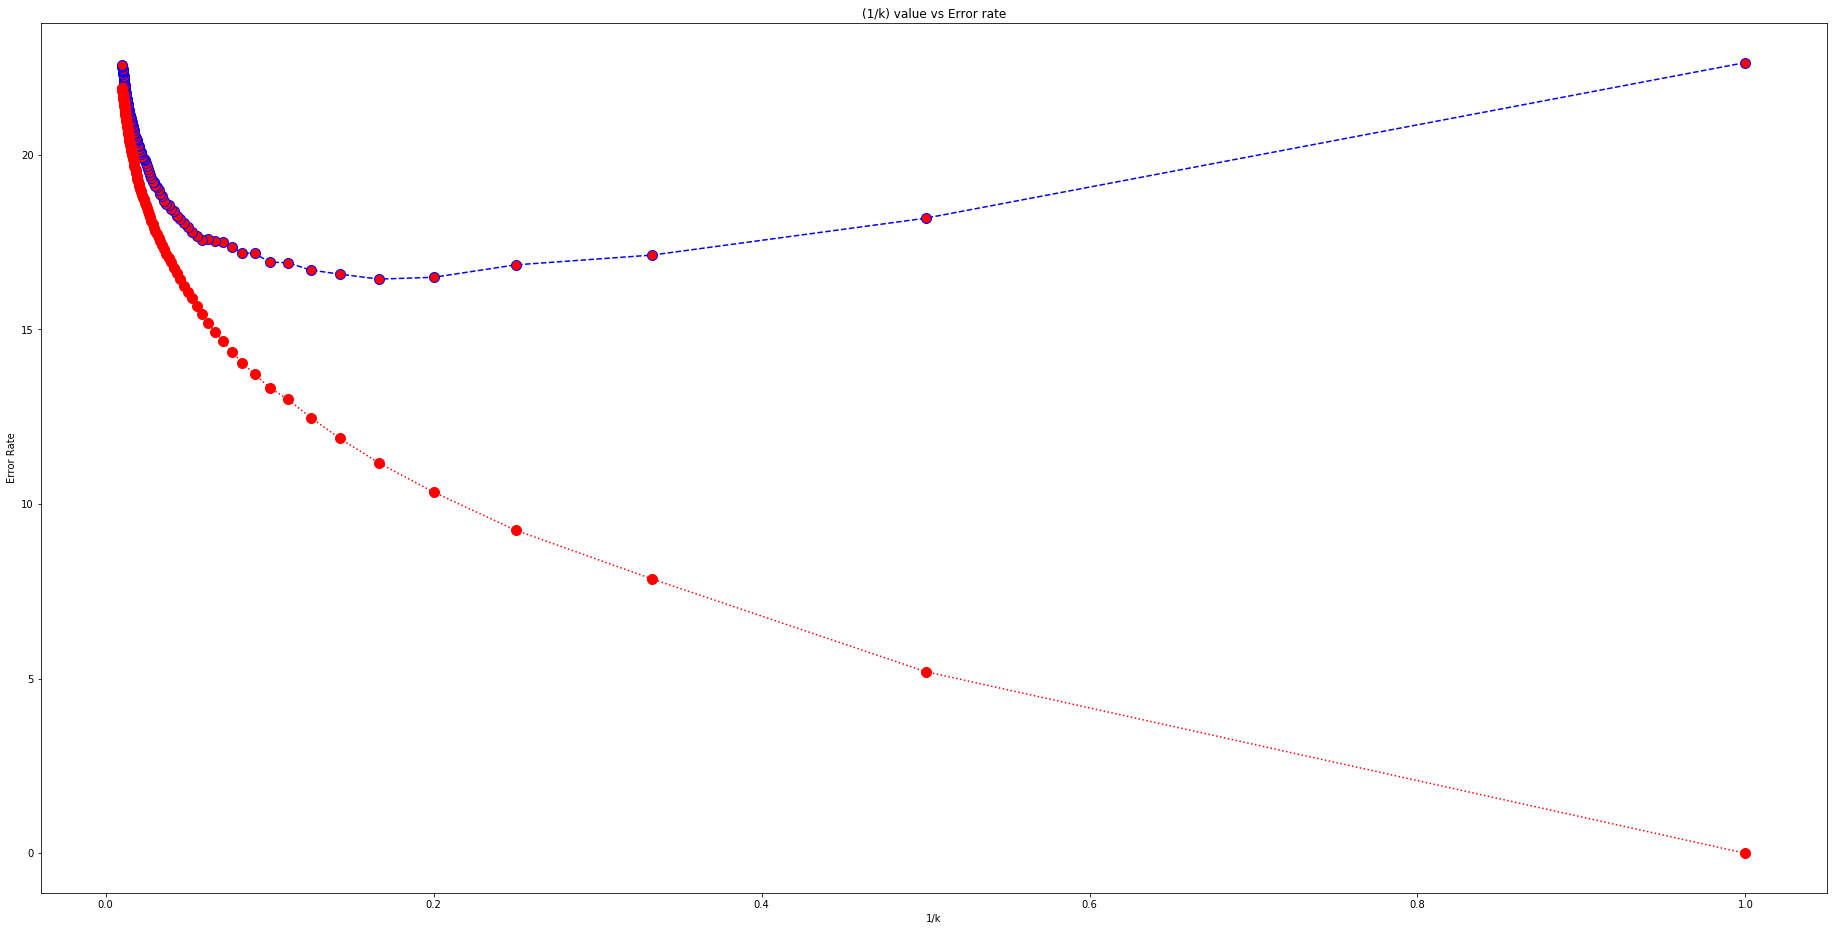

In [26]:
# Plotting the train and test errors in terms of 1/k for raw features
k_inv = []
for i in range(1,101,1):
    a = 1/i
    k_inv.append(a)

plt.figure(figsize=(32, 16))
plt.plot(k_inv, test_err_list, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.plot(k_inv, train_err_list, color='red', linestyle='dotted', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('(1/k) value vs Error rate')
plt.xlabel('1/k')
plt.ylabel('Error Rate')

In [27]:
#Splitting the data into training and test data sets With Normalized features
X_train1 = X_train
Y_train1 = Y_train
X_test1 = X_test
Y_test1 = Y_test

scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train1)
X_test1 = scaler.transform(X_test1)

In [28]:
#Calculating test error with normalized features for k ∈ {1,2,...,100}
test_err_list_norm = []
test_err_norm = {}
min_test_k_norm = -1
min_test_err_norm = 50

for k in range(1,101,1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train1, Y_train1)
    pred_i_test_norm = knn.predict(X_test1)
    error = metrics.mean_squared_error(Y_test1, pred_i_test_norm) 
    test_err_norm[k] = error
    test_err_list_norm.append(error)
    if(error < min_test_err_norm):
        min_test_err_norm = error
        min_test_k_norm = k
#     print(k, error)
    
print("Minimum test error is ", min_test_err_norm, "for k = ", min_test_k_norm)

Minimum test error is  14.699928989202379 for k =  5


In [29]:
#Calculating train error with normalized features for k ∈ {1,2,...,100}
train_err_list_norm = []
train_err_norm = {}
min_train_k_norm = -1
min_train_err_norm = 50

for k in range(1,101,1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train1, Y_train1)
    pred_i_train_norm = knn.predict(X_train1)
    error = metrics.mean_squared_error(Y_train1, pred_i_train_norm) 
    train_err_norm[k] = error
    train_err_list_norm.append(error)
    if(k != 1 and error < min_train_err_norm):
        min_train_err_norm = error
        min_train_k_norm = k
#     print(k, error)
    
print("Minimum train error is ", min_train_err_norm, "for k = ", min_train_k_norm)

Minimum train error is  4.813753572495147 for k =  2


Text(0, 0.5, 'Error Rate')

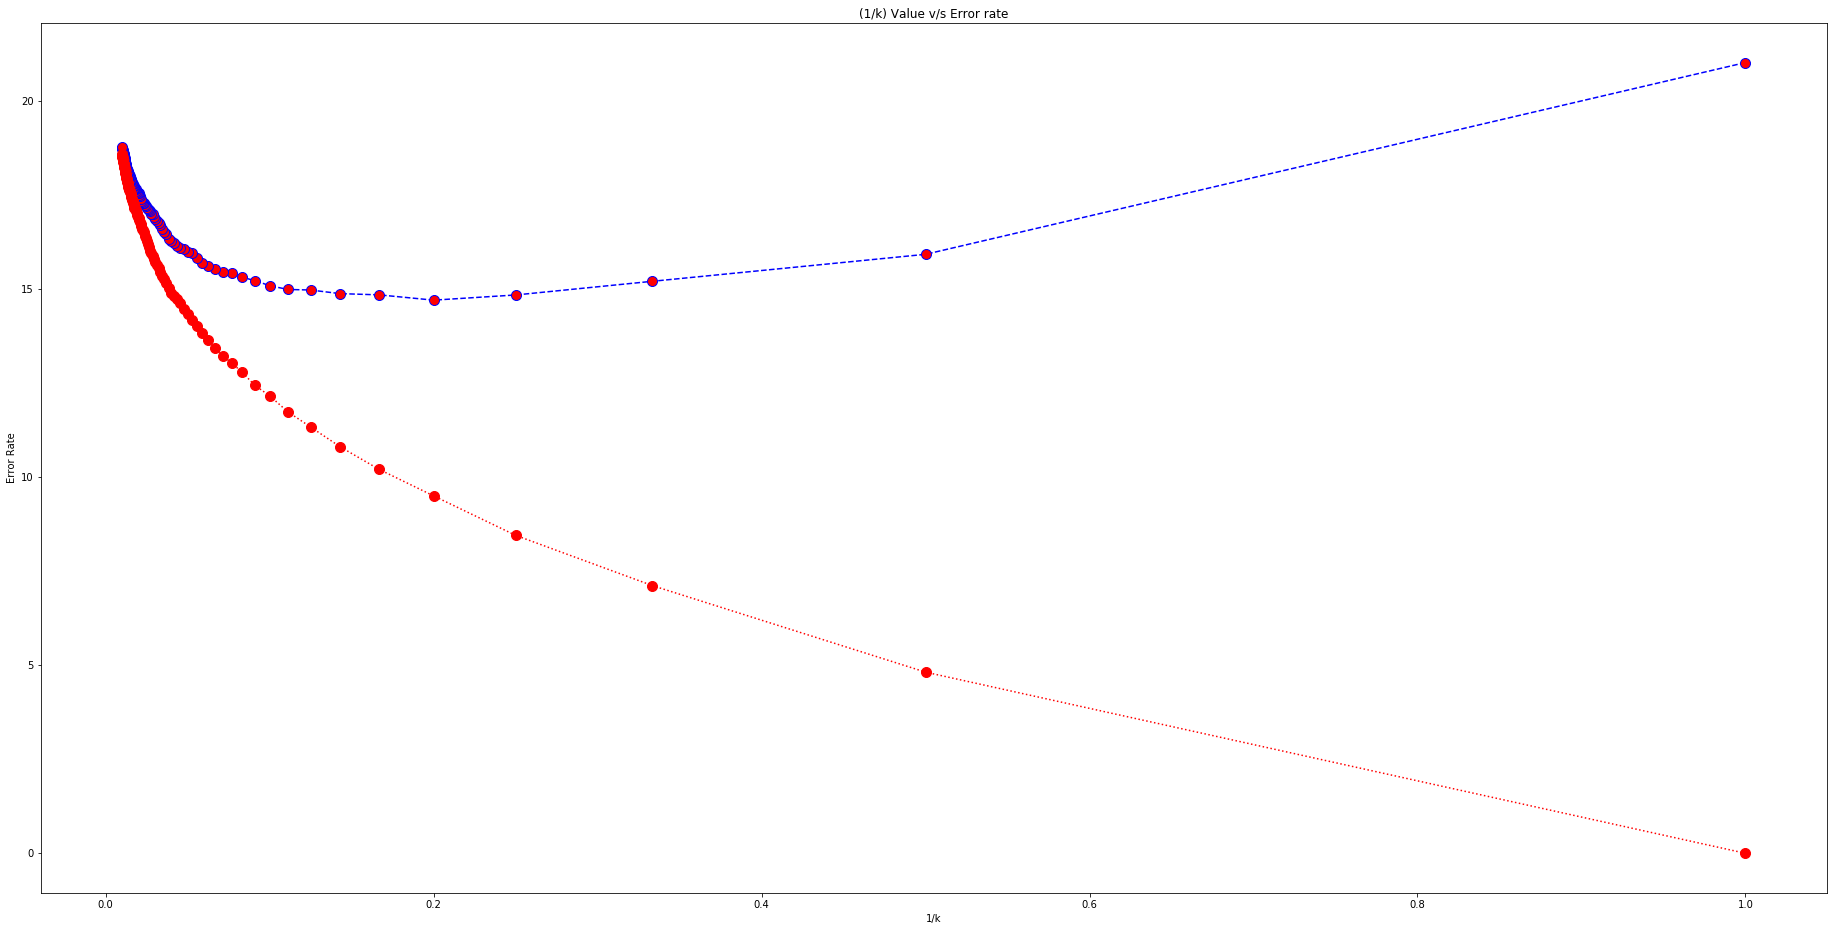

In [30]:
# Plotting the train and test errors in terms of 1/k for normalized features
plt.figure(figsize=(32,16))
plt.plot(k_inv, test_err_list_norm, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.plot(k_inv, train_err_list_norm, color='red', linestyle='dotted', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title( '(1/k) Value v/s Error rate')
plt.xlabel('1/k')
plt.ylabel('Error Rate')